### <center><font color=166E64></font><font color=15D77D> </font><font color=5B1746>The Spark Foundation</font></center>

### <center><font color=166E64></font><font color=15D77D> </font><font color=5B1746>Data Science and Business Analytics</font></center>

#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### <center><font color=166E64>Author </font><font color=15D77D>: </font><font color=5B1746>Ravikiran S Basutkar</font></center>
#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#GRIPAPRIL21

# <center><font color=15D77D>Task 2 : Prediction using Unsupervised ML</font></center>
### <center><font color=166E64>Problem Statement: </font><font color=AB3988>Predict the optimum number of clusters from iris dataset and represent it visually .</font>
#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [1]:
#Importing Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the iris dataset
iris = pd.read_csv("Iris.csv")

In [3]:
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
# we will drop 1st column Id as it is just serial number , nominal data
iris1 =iris.drop(['Id'],inplace=False,axis=1)

In [5]:
iris1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
iris1.describe()  #we can see below that Species column (output column) class is not shown as it non numeric , categorical data.

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris1.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
features_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [9]:
iris_df = pd.DataFrame(iris1, columns = features_names)
iris_df.head() 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
print(pd.DataFrame(x).head(5))
print(pd.DataFrame(x).tail(5))

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2
       0    1    2    3
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8


### EDA

<AxesSubplot:>

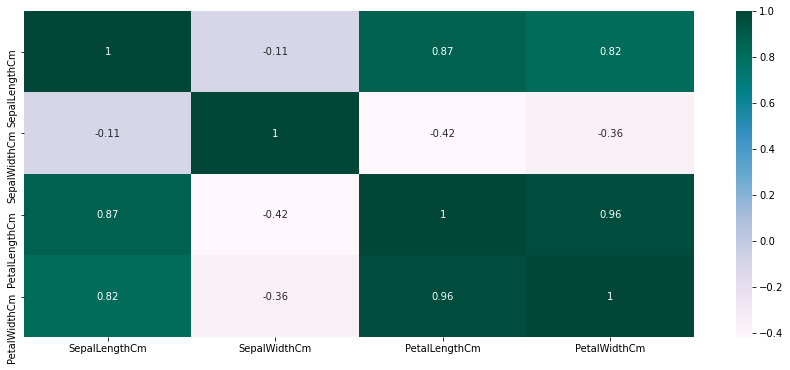

In [11]:
#heatmap
plt.figure(figsize=(15,6))
sns.heatmap(iris1.corr(),annot=True,cmap="PuBuGn")

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

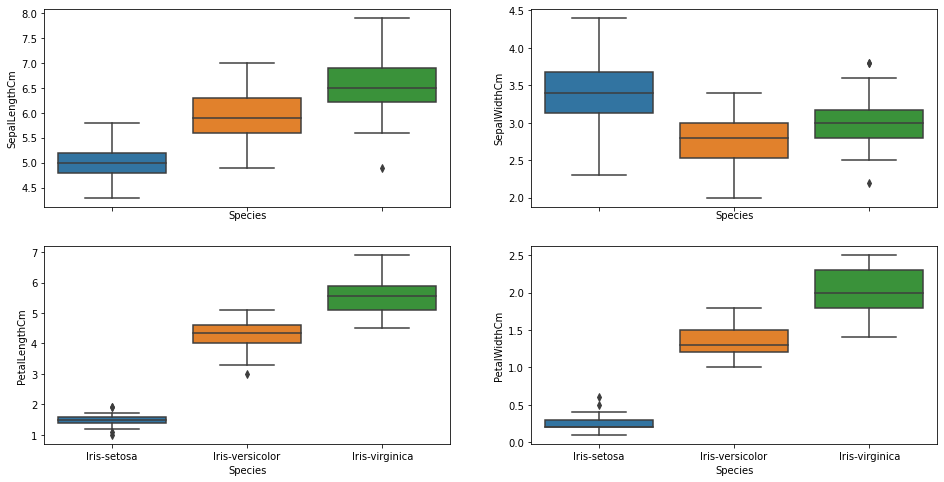

In [12]:
#to check outliers
# Boxplot
_, ax = plt.subplots(2, 2, sharex=True, figsize=(16, 8))
sns.boxplot(x='Species', y='SepalLengthCm', data=iris1, ax=ax[0,0])
sns.boxplot(x='Species', y='SepalWidthCm', data=iris1, ax=ax[0,1])
sns.boxplot(x='Species', y='PetalLengthCm', data=iris1, ax=ax[1,0])
sns.boxplot(x='Species', y='PetalWidthCm', data=iris1, ax=ax[1,1])

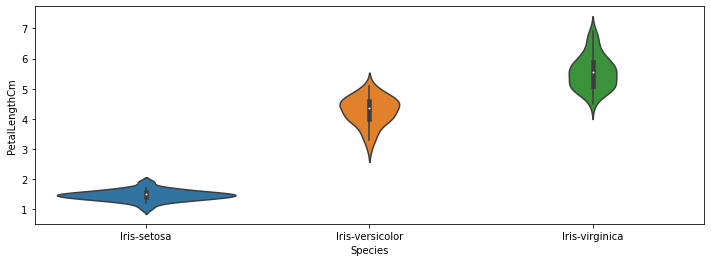

In [13]:
# violin plot
plt.figure(figsize=(12,4))
sns.violinplot(x="Species",y="PetalLengthCm",data=iris1)
plt.show()

### Ploting Elbow Method

Text(0, 0.5, 'total_within_SS')

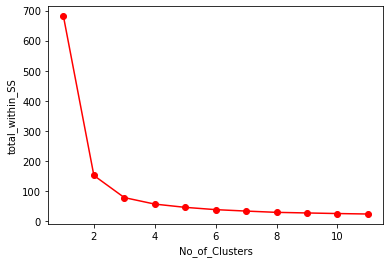

In [14]:
# Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
k = list(range(1,12))    
# Scree plot 
plt.plot(k, wcss, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

In [15]:
#From this we choose the number of clusters as ** '3**'.

In [16]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans_model = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans_model.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [17]:
kmeans_model.labels_ # getting the labels of clusters assigned to each row 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [18]:
output_class = iris1.iloc[:, [4]].values


In [19]:
iris1['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [20]:
iris1['Species'].nunique()

3

In [21]:
iris1['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
Y = (np.array(labelencoder.fit_transform(output_class)))
df_output=pd.concat([pd.DataFrame(Y),pd.DataFrame(output_class),pd.DataFrame(y_kmeans)],axis=1)
df_output.columns=(['Y','Species','Kmeans_clustered'])
print(df_output.head(5))
print(df_output.tail(5))

   Y      Species  Kmeans_clustered
0  0  Iris-setosa                 1
1  0  Iris-setosa                 1
2  0  Iris-setosa                 1
3  0  Iris-setosa                 1
4  0  Iris-setosa                 1
     Y         Species  Kmeans_clustered
145  2  Iris-virginica                 0
146  2  Iris-virginica                 2
147  2  Iris-virginica                 0
148  2  Iris-virginica                 0
149  2  Iris-virginica                 2


In [23]:
#Mapping the input x with y_kmeans  #broadly
#as the 1st row is Iris-setosa
# and y_kmeans has 1st value =1
# => y_kmeans =1 is Iris-Setosa
#similarly y_kmeans=2 is Iris-versicolor
#and y_kmeans=0 is Iris-virginica

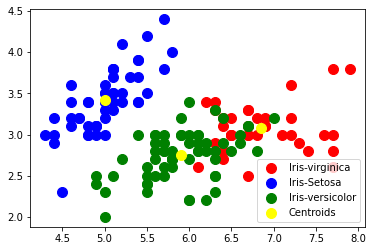

In [24]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-virginica')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-Setosa')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-versicolor')

# Plotting the centroids of the clusters
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

### plotting actual values on first two columns

In [25]:
kmeans_model.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

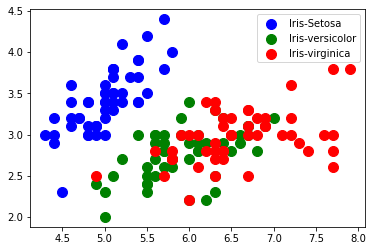

In [26]:
#plotting actual values on first two columns
#plt.scatter(x[:, 0], x[:, 1], c=Y, cmap='gist_rainbow',edgecolor='k', s=50)
plt.scatter(x[Y == 0, 0], x[Y == 0, 1], 
            s = 100, c = 'blue', label = 'Iris-Setosa')
plt.scatter(x[Y == 1, 0], x[Y == 1, 1], 
            s = 100, c = 'green', label = 'Iris-versicolor')
plt.scatter(x[Y == 2, 0], x[Y == 2, 1],
            s = 100, c = 'red', label = 'Iris-virginica')
plt.legend()

In [27]:
### Comparing acutal and Predicted values on 3rd and 4th column

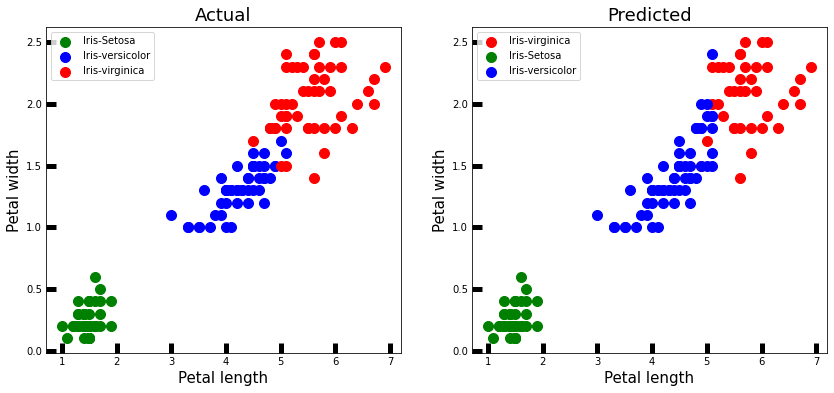

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].scatter(x[Y == 0, 2], x[Y == 0, 3], s = 100, c = 'green', label = 'Iris-Setosa')
axes[1].scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], s = 100, c = 'red', label = 'Iris-virginica')

axes[0].scatter(x[Y == 1, 2], x[Y == 1, 3], s = 100, c = 'blue', label = 'Iris-versicolor')
axes[1].scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], s = 100, c = 'green', label = 'Iris-Setosa')

axes[0].scatter(x[Y == 2, 2], x[Y == 2, 3], s = 100, c = 'red', label = 'Iris-virginica')
axes[1].scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3], s = 100, c = 'blue', label = 'Iris-versicolor')


axes[0].set_xlabel('Petal length', fontsize=15)
axes[0].set_ylabel('Petal width', fontsize=15)
axes[1].set_xlabel('Petal length', fontsize=15)
axes[1].set_ylabel('Petal width', fontsize=15)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=10)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=10)
axes[0].set_title('Actual', fontsize=18)
axes[0].legend()
axes[1].set_title('Predicted', fontsize=18)
axes[1].legend()

In [29]:
#we can see that model is working well with respect to 3rd and 4th column ie Petal length and Petal Width

### Evaluation of Model

In [30]:
iris1['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [31]:
pd.value_counts(y_kmeans)   #originally give data has each of clas 50 each but after clustering we got 62 of type 2, 50 of type 1 and 38 of type 0;
# implying that there is some error in classification when compared to actual values.

2    62
1    50
0    38
dtype: int64

### As the 4 input columns have different range of values so we apply "Normalization" on each column

In [32]:
#Appliying Normalization/Standardization/Scaling values

from sklearn.preprocessing import StandardScaler
#help(StandardScaler())
scaler = StandardScaler()                              
##we can also apply Standarise function
# Standardise function 
#def sc_func(i):
#   x = (i-i.min())/(i.max()-i.min())
#    return (x)


In [33]:
#def norm_func(i):
#   x = (i-i.mean())/(i.std())
#    return (x)

In [34]:
#iris_s2 = sc_func(iris_df.iloc[:,:])
#iris_s2
iris_n=scaler.fit_transform(iris_df.iloc[:,:])
(pd.DataFrame(iris_n)).describe()

,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-5.140333e-16,1.154632e-16,9.251859e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


In [35]:
# Applying kmeans to the Standardized dataset / Creating the kmeans classifier
kmeans_model2 = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans_norm = kmeans_model2.fit_predict(iris_n)
y_kmeans_norm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [36]:
pd.value_counts(y_kmeans_norm)  

2    53
1    50
0    47
dtype: int64

### we can see that all classes (categories) are near to 50 unlike previous model were normalization was not applied

### 13. Plotting 3D clusters

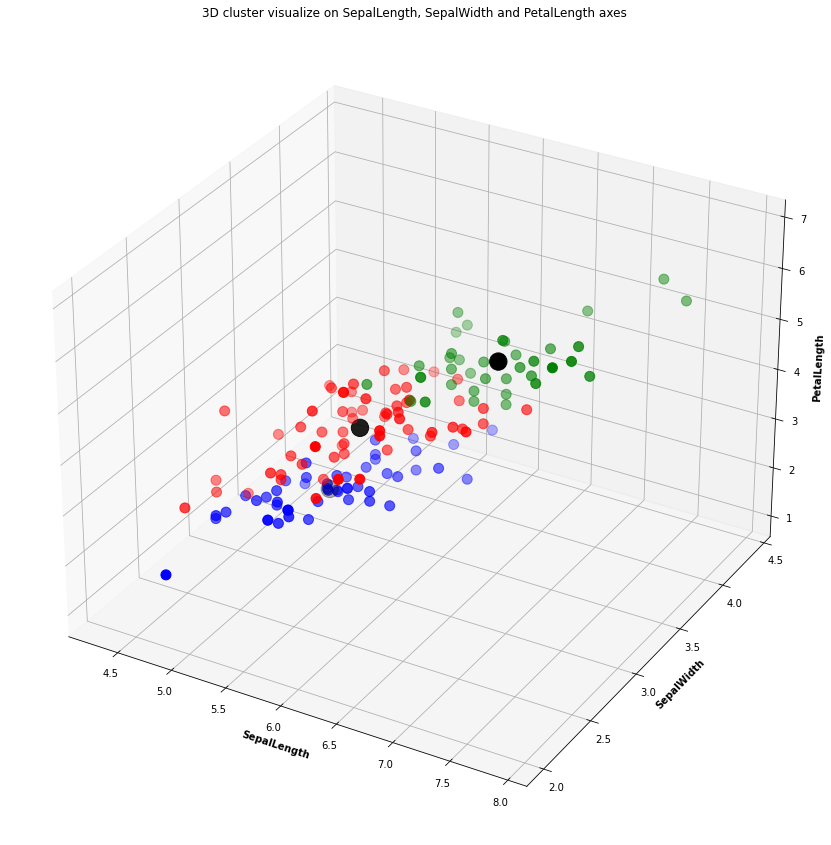

In [37]:
fig = plt.figure(figsize = (15, 15))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x[y_kmeans== 0, 0],x[y_kmeans == 0, 1], x[y_kmeans == 0, 2], s = 100, c = 'green', label = 'Iris-Setosa')
ax.scatter3D(x[y_kmeans == 1, 0],x[y_kmeans == 1, 1], x[y_kmeans == 1, 2], s = 100, c = 'blue', label = 'Iris-virginica')
ax.scatter3D(x[y_kmeans == 2, 0],x[y_kmeans == 2, 1], x[y_kmeans == 2, 2], s = 100, c = 'red', label = 'Iris-versicolor')
plt.title("3D cluster visualize on SepalLength, SepalWidth and PetalLength axes")
#Plotting the centroids of the clusters
ax.scatter3D(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:,1],kmeans_model.cluster_centers_[:,2], s = 300, c = 'black', label = 'Centroids')
ax.set_xlabel('SepalLength', fontweight ='bold')
ax.set_ylabel('SepalWidth', fontweight ='bold')
ax.set_zlabel('PetalLength', fontweight ='bold')
# show plot
plt.show()

### THANKS :)